# ID2214/FID3214 FX Assignment

[VASIGARAN SENTHILKUMAR, vsen@kth.se]


1a. Methodology

Assume that we want to compare a new algorithm to a baseline
algorithm, for some classification task. As we are not sure what
hyper-parameter settings to use for the new algorithm, we will
investigate 100 different settings for that, while we use a standard
hyper-parameter setting for the baseline algorithm. We first randomly
split a given dataset into two equal-sized halves; one for model
building and one for testing. We then employ 10-fold cross-validation
using the first half of the data, measuring the accuracy of each model
generated from an algorithm and hyper-parameter setting. Assume that
the best performing hyper-parameter setting for the new algorithm
results in a higher (cross-validation) accuracy than the baseline
algorithm. Should we expect to see the same relative performance,
i.e., the new algorithm (with the best-performing hyper-parameter
setting) outperforming the baseline (with the standard hyper-parameter
setting), when the two models (trained on the entire first half) are
evaluated on the second half of the data?

Brief summary of my observations:

Observation 1:

data set-breast-cancer.csv

Baseline crossvalidation accuracy: 0.9438423645320198

best hyper-parameter setting accuracy: 0.9613300492610838

classifier: RandomForestClassifier

best hyper-parameter setting: (n_estimators=50,max_features='sqrt',criterion='entropy',class_weight='balanced',min_samples_split=5)

The number of hyperp parameter settings that outperforms the baseline : 39

baseline accuracy trained on first half evalauated on second half-0.9543859649122807

best-hyper paramater setting accuracy with training on first half and evaluated on second half-0.9438596491228071

The model is most likely biased due to sampling error. Because we have evalauted more than 100 different configurations for the algorithm.
The best performing hyper paramter setting accuracy is higher than the baseline accuracy with crossvalidation on the first half of data.
Also the number of hyper paramter settings accuracy that outperform the baseline is comparitively low. 
The overestimation of the performance in first half reflects in the baseline accuracy outperforming the best hyper paramater setting accuracy.





In [1]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from statistics import mean
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import StratifiedKFold
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import tree

In [141]:
#1.A

In [ ]:
#I tried this extensively with two different data sets

In [142]:
df=pd.read_csv('/Users/vasigarans/Downloads/breast-cancer.csv')

link to dataset: https://www.kaggle.com/yasserh/breast-cancer-dataset

In [143]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:>

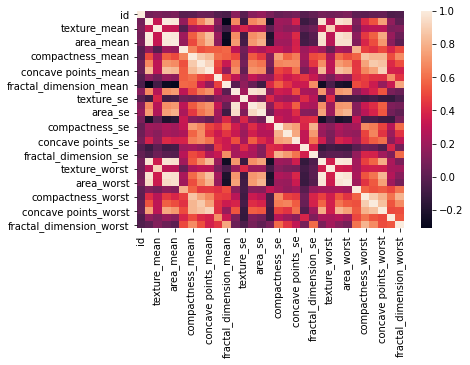

In [144]:
sns.heatmap(df.corr())

In [145]:
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [146]:
df['diagnosis'].value_counts()  #Class proportions. There seems not big class imbalancing in the data set

B    357
M    212
Name: diagnosis, dtype: int64

In [147]:
correlated_features = set()
correlation_matrix = df.corr()
    
for i in range(len(correlation_matrix .columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.9:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)

    #display(correlated_features)

df=df.drop(labels=correlated_features, axis=1)
#There were no correlated features, hence no features were dropped. 

In [148]:
df=df.drop(labels=['id'],axis=1)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   compactness_mean         569 non-null    float64
 5   concavity_mean           569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   radius_se                569 non-null    float64
 9   texture_se               569 non-null    float64
 10  smoothness_se            569 non-null    float64
 11  compactness_se           569 non-null    float64
 12  concavity_se             569 non-null    float64
 13  concave points_se        569 non-null    float64
 14  symmetry_se              5

In [150]:
def split_data(df):
    y=df['diagnosis']
    X=df.drop(labels=['diagnosis'],axis=1)
    train_df, test_df, train_labels, test_labels=train_test_split(X,y,test_size=0.5,random_state=41,stratify=y)
    return train_df, test_df, train_labels, test_labels

In [151]:
train_df, test_df, train_labels, test_labels=split_data(df);  #This step involves splitting the dataset in two halves. 
#I did a stratified split keeping in mind the class imbalance.

In [152]:
train_df.shape

(284, 20)

In [153]:
train_labels.value_counts()

B    178
M    106
Name: diagnosis, dtype: int64

In [154]:
test_labels.value_counts()

B    179
M    106
Name: diagnosis, dtype: int64

In [155]:
def cross_val_score_mean_baseline(train_df,train_labels):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=41)
    clf = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier())
    #clf = tree.DecisionTreeClassifier()
    #f1 = cross_val_score(pipeline, train_df, train_labels, scoring = 'f1', cv = cv,n_jobs=-1)
    #auc = cross_val_score(clf, train_df, train_labels, scoring = 'roc_auc', cv = cv)
    scores = cross_val_score(clf, train_df, train_labels, scoring = 'accuracy', cv = cv)
    print(mean(scores))
    return mean(scores)


In [156]:
base_line_score=cross_val_score_mean_baseline(train_df,train_labels)
#Identified the crossvalidation accuracy of the  baseline algorithm with the standard hyper parameter settings on the first 
#half of the data set.
#Mean Accuracy is 0.9438423645320198

0.9438423645320198


In [157]:
def manual(train_df,train_labels):
    all_best=dict()
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=41)
    for p1 in [5,10, 50, 25,100 ]:
        for p2 in ['auto',"sqrt"]:
            for p3 in ['gini','entropy']:
                for p4 in [None,'balanced']:
                    for p5 in [2,5,10]:
                        clf = make_pipeline(preprocessing.StandardScaler(),RandomForestClassifier(n_estimators=p1,max_features=p2,criterion=p3,class_weight=p4,min_samples_split=p5))
                        scores = cross_val_score(clf, train_df, train_labels, scoring = 'accuracy', cv = cv)
                        all_best[(p1,p2,p3,p4,p5)]=mean(scores)
    return all_best
    
    
    

In [158]:
all_best=manual(train_df,train_labels)
# In This step the crossvalidation accuracies with various hyper parameter settings is evaluated on the first half of the data
#Stored the hyper parameter setting and the corresponding accuracies in a dictionary


In [159]:
display(all_best)

{(5, 'auto', 'gini', None, 2): 0.922783251231527,
 (5, 'auto', 'gini', None, 5): 0.9118226600985222,
 (5, 'auto', 'gini', None, 10): 0.9153940886699508,
 (5, 'auto', 'gini', 'balanced', 2): 0.9082512315270936,
 (5, 'auto', 'gini', 'balanced', 5): 0.9225369458128079,
 (5, 'auto', 'gini', 'balanced', 10): 0.9190886699507389,
 (5, 'auto', 'entropy', None, 2): 0.8943349753694582,
 (5, 'auto', 'entropy', None, 5): 0.929679802955665,
 (5, 'auto', 'entropy', None, 10): 0.9156403940886699,
 (5, 'auto', 'entropy', 'balanced', 2): 0.9123152709359605,
 (5, 'auto', 'entropy', 'balanced', 5): 0.9222906403940887,
 (5, 'auto', 'entropy', 'balanced', 10): 0.9016009852216749,
 (5, 'sqrt', 'gini', None, 2): 0.9192118226600985,
 (5, 'sqrt', 'gini', None, 5): 0.926231527093596,
 (5, 'sqrt', 'gini', None, 10): 0.9192118226600985,
 (5, 'sqrt', 'gini', 'balanced', 2): 0.9334975369458128,
 (5, 'sqrt', 'gini', 'balanced', 5): 0.9298029556650247,
 (5, 'sqrt', 'gini', 'balanced', 10): 0.9222906403940887,
 (5, 's

In [160]:
def hyper_param_base_comparison(all_best,base_line_score):
    no_of_big_hyp=0
    bv=0.0
    bp='x'
    for key,val in all_best.items():
        #display(key,val )
        if(val>bv):
            bv=val
            bp=key
        if(val>base_line_score):
            no_of_big_hyp=no_of_big_hyp+1
            
    display('The best performing hyper parameter accuracy is ', bv)
    display('The best performing hyper parameter setting is ', bp)
    display('The number of hyperper parameter settings that outperforms the baseline is ',no_of_big_hyp )
        

In [161]:
hyper_param_base_comparison(all_best,base_line_score)
# There is less number of hyper parameter settings that outperforms the baseline
# we have evaluated 100 different configurations for the novel algorithm, the observed cv
# accuracy for the best performing of these is most likely biased due to sampling error.
# Since less number of hyper parameter settings outperforms the baseline
# the corresponding model trained with the best setting on first half and 
# evaluated on the second half will be outperformed by the baseline.


'The best performing hyper parameter accuracy is '

0.9613300492610838

'The best performing hyper parameter setting is '

(50, 'sqrt', 'entropy', 'balanced', 5)

'The number of hyperper parameter settings that outperforms the baseline is '

39

In [162]:
def create_preprocess(train_df,test_df):
    
    scaler = StandardScaler()

    train_df = pd.DataFrame(scaler.fit_transform(train_df), columns = train_df.columns)

    test_df = pd.DataFrame(scaler.transform(test_df), columns = train_df.columns)

    return train_df,test_df
    

In [163]:
train_df,test_df=create_preprocess(train_df,test_df)
# preprocessing step. Earlier crossvalidation pipeline was used for preprocessing

In [164]:
def second_half_evaluation_baseline(train_df,train_labels,test_df,test_labels):
    clf = RandomForestClassifier()
    clf.fit(train_df,train_labels)
    proba=clf.predict_proba(test_df)
    test_pred=clf.predict(test_df)
    
    print("Test set Accuracy: ", accuracy_score(test_labels,test_pred))

In [165]:
second_half_evaluation_baseline(train_df,train_labels,test_df,test_labels)

Test set Accuracy:  0.9543859649122807


In [168]:
def second_half_evaluation_hyper(train_df,train_labels,test_df,test_labels):
    clf = RandomForestClassifier(n_estimators=50,max_features='sqrt',criterion='entropy',class_weight='balanced',min_samples_split=5)
    clf.fit(train_df,train_labels)
    proba=clf.predict_proba(test_df)
    test_pred=clf.predict(test_df)
    print("Test set Accuracy: ", accuracy_score(test_labels,test_pred))

In [169]:
second_half_evaluation_hyper(train_df,train_labels,test_df,test_labels)

Test set Accuracy:  0.9438596491228071


In [170]:
#We observe that best setting hyperparammter setting trained on first half and 
# evaluated on the second half is outperformed by the baseline.

In [1]:
# On testing the same 1.a  with a different data set , I analysed the results as below

Brief summary of my observations:

Observation 2:

data set-healthcare-dataset-stroke-data.csv

Baseline crossvalidation accuracy: 0.9176970300315248

best hyper-parameter setting accuracy: 0.9576256844201095

classifier: DecisionTreeClassifier

best hyper-parameter setting: (max_depth=50,max_features=2,min_samples_leaf=10)

The number of hyper parameter settings that outperforms the baseline : 80

baseline accuracy trained on first half evalauated on second half-0.9197556008146639

best-hyper paramater setting accuracy with training on first half and evaluated on second half-0.9572301425661914

The model is also likely biased due to sampling error. Because we have evalauted more than 100 different configurations for the algorithm.
The best performing hyper paramter setting accuracy is higher than the baseline accuracy with crossvalidation on the first half of data.
But the number of hyper paramter settings accuracy that outperform the baseline is comparitively higher.  
The overestimation of the performance in first half does not reflect as the best hyper paramater setting accuracy outperforms baseline.





In [37]:
df=pd.read_csv('/Users/vasigarans/Downloads/healthcare-dataset-stroke-data.csv')

link to data set: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [38]:
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<AxesSubplot:>

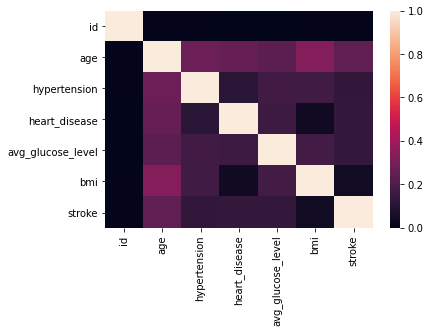

In [39]:
sns.heatmap(df.corr())

In [40]:
df['stroke'].value_counts() #There is huge class imbalance observed in the data set in comparison to the previous data set

0    4861
1     249
Name: stroke, dtype: int64

In [41]:
def split_data(df):
    y=df['stroke']
    X=df.drop(labels=['stroke','id'],axis=1)
    train_df, test_df, train_labels, test_labels=train_test_split(X,y,test_size=0.5,random_state=41,stratify=y)
    return train_df, test_df, train_labels, test_labels

In [42]:
df=df.dropna(axis=0)
train_df, test_df, train_labels, test_labels=split_data(df)

In [43]:
train_labels.value_counts()

0    2350
1     104
Name: stroke, dtype: int64

In [44]:
test_labels.value_counts()

0    2350
1     105
Name: stroke, dtype: int64

In [45]:
ntrain_df=train_df.copy()
ntest_df=test_df.copy()
display(train_df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2642,Female,67.0,0,0,Yes,Private,Rural,66.08,36.2,never smoked
1078,Male,27.0,0,0,No,Private,Urban,112.98,44.7,never smoked
2017,Female,50.0,0,0,Yes,Private,Urban,95.01,26.2,formerly smoked
3783,Male,78.0,0,0,Yes,Self-employed,Rural,93.85,22.7,formerly smoked
2212,Female,34.0,0,0,Yes,Private,Urban,97.23,27.5,Unknown
...,...,...,...,...,...,...,...,...,...,...
562,Female,1.8,0,0,No,children,Urban,58.26,16.5,Unknown
810,Male,55.0,0,0,Yes,Private,Rural,86.60,26.5,never smoked
1778,Male,76.0,1,0,Yes,Private,Rural,225.60,29.0,never smoked
1377,Female,32.0,0,0,No,Self-employed,Rural,93.17,27.5,smokes


In [46]:
# Converting the categorical target variable to numerical
def create_preprocess(train_df,test_df):
    categorical = ["gender", "ever_married", "work_type", "Residence_type","smoking_status"]
    for feature in categorical:
        le = preprocessing.LabelEncoder()
        train_df[feature] = le.fit_transform(train_df[feature])
        test_df[feature] = le.transform(test_df[feature])
    scaler = StandardScaler()

    train_df = pd.DataFrame(scaler.fit_transform(train_df), columns = train_df.columns)

    test_df = pd.DataFrame(scaler.transform(test_df), columns = train_df.columns)

    return train_df,test_df
    

In [47]:
train_df,test_df=create_preprocess(train_df,test_df)

In [48]:
display(train_df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-0.846929,1.054560,-0.316157,-0.235550,0.704515,-0.137232,-1.021419,-0.880731,0.911413,0.563094
1,1.176795,-0.741360,-0.316157,-0.235550,-1.419416,-0.137232,0.979030,0.133990,1.995888,0.563094
2,-0.846929,0.291294,-0.316157,-0.235550,0.704515,-0.137232,0.979030,-0.254806,-0.364439,-0.382072
3,1.176795,1.548437,-0.316157,-0.235550,0.704515,0.785418,-1.021419,-0.279904,-0.810988,-0.382072
4,-0.846929,-0.427074,-0.316157,-0.235550,0.704515,-0.137232,0.979030,-0.206774,-0.198579,-1.327239
...,...,...,...,...,...,...,...,...,...,...
2449,-0.846929,-1.872789,-0.316157,-0.235550,-1.419416,1.708067,0.979030,-1.049923,-1.602016,-1.327239
2450,1.176795,0.515784,-0.316157,-0.235550,0.704515,-0.137232,-1.021419,-0.436763,-0.326164,0.563094
2451,1.176795,1.458641,3.162987,-0.235550,0.704515,-0.137232,-1.021419,2.570619,-0.007201,0.563094
2452,-0.846929,-0.516870,-0.316157,-0.235550,-1.419416,0.785418,-1.021419,-0.294616,-0.198579,1.508261


In [49]:
display(test_df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-0.846929,-1.684217,-0.316157,-0.23555,-1.419416,1.708067,0.979030,-0.340484,-0.887539,-1.327239
1,1.176795,-1.459727,-0.316157,-0.23555,-1.419416,1.708067,-1.021419,-0.022870,-0.823746,0.563094
2,-0.846929,-0.741360,-0.316157,-0.23555,0.704515,-0.137232,0.979030,-0.650093,3.169672,-1.327239
3,-0.846929,0.111702,-0.316157,-0.23555,-1.419416,-1.982531,-1.021419,0.119061,-0.708920,-1.327239
4,1.176795,0.785172,-0.316157,-0.23555,-1.419416,-0.137232,-1.021419,0.720105,0.056592,0.563094
...,...,...,...,...,...,...,...,...,...,...
2450,-0.846929,-1.818911,-0.316157,-0.23555,-1.419416,1.708067,-1.021419,-0.198769,-0.415473,-1.327239
2451,1.176795,0.740274,-0.316157,-0.23555,0.704515,-1.982531,-1.021419,2.087490,0.082109,0.563094
2452,1.176795,-0.471972,-0.316157,-0.23555,0.704515,-1.982531,0.979030,-0.518331,-0.466508,-1.327239
2453,-0.846929,-1.280135,-0.316157,-0.23555,-1.419416,1.708067,0.979030,-0.568526,-0.964090,-1.327239


In [50]:
def cross_val_score_mean_baseline_dt(train_df,train_labels):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=41)
    #clf = RandomForestClassifier()
    clf = tree.DecisionTreeClassifier()
    #f1 = cross_val_score(pipeline, train_df, train_labels, scoring = 'f1', cv = cv,n_jobs=-1)
    auc = cross_val_score(clf, train_df, train_labels, scoring = 'roc_auc', cv = cv)
    scores = cross_val_score(clf, train_df, train_labels, scoring = 'accuracy', cv = cv)
    
    print(scores)
    print(mean(scores))
    return mean(scores)


In [51]:
base_line_score_dt=cross_val_score_mean_baseline_dt(train_df,train_labels)
#Identified the crossvalidation accuracy of the  baseline algorithm with the standard hyper parameter settings on the first 
#half of the data set.
#Mean Accuracy is 0.9176970300315248

[0.8902439  0.93089431 0.91463415 0.90650407 0.93061224 0.89795918
 0.93061224 0.91428571 0.93061224 0.93061224]
0.9176970300315248


In [52]:
def manual_dt(train_df,train_labels):
    all_best_dt=dict()
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=41)
    for p1 in [20,40,50,25,75 ]:
        for p2 in range(1,5):
            for p3 in [10,300,100,200]:
                        clf = tree.DecisionTreeClassifier(max_depth=p1,max_features=p2,min_samples_leaf=p3)
                        scores = cross_val_score(clf, train_df, train_labels, scoring = 'accuracy', cv = cv)
                        all_best_dt[(p1,p2,p3)]=mean(scores)
    return all_best_dt
    
    
    

In [53]:
all_best_dt=manual_dt(train_df,train_labels)
# In This step the crossvalidation accuracies with various hyper parameter settings is evaluated on the first half of the data
#Stored the hyper parameter setting and the corresponding accuracies in a dictionary

In [54]:
display(all_best_dt)

{(20, 1, 10): 0.957624025219844,
 (20, 1, 300): 0.957624025219844,
 (20, 1, 100): 0.957624025219844,
 (20, 1, 200): 0.957624025219844,
 (20, 2, 10): 0.9564045130247221,
 (20, 2, 300): 0.957624025219844,
 (20, 2, 100): 0.957624025219844,
 (20, 2, 200): 0.957624025219844,
 (20, 3, 10): 0.957624025219844,
 (20, 3, 300): 0.957624025219844,
 (20, 3, 100): 0.957624025219844,
 (20, 3, 200): 0.957624025219844,
 (20, 4, 10): 0.9568076986892318,
 (20, 4, 300): 0.957624025219844,
 (20, 4, 100): 0.957624025219844,
 (20, 4, 200): 0.957624025219844,
 (40, 1, 10): 0.957624025219844,
 (40, 1, 300): 0.957624025219844,
 (40, 1, 100): 0.957624025219844,
 (40, 1, 200): 0.957624025219844,
 (40, 2, 10): 0.9555865272938444,
 (40, 2, 300): 0.957624025219844,
 (40, 2, 100): 0.957624025219844,
 (40, 2, 200): 0.957624025219844,
 (40, 3, 10): 0.955993031358885,
 (40, 3, 300): 0.957624025219844,
 (40, 3, 100): 0.957624025219844,
 (40, 3, 200): 0.957624025219844,
 (40, 4, 10): 0.9551816824290692,
 (40, 4, 300): 0.9

In [61]:
def dt(all_best):
    no_of_big_hyp=0
    bv=0.0
    bp='x'
    for key,val in all_best_dt.items():
        #display(key,val )
        if(val>bv):
            bv=val
            bp=key
        if(val>base_line_score_dt):
            no_of_big_hyp=no_of_big_hyp+1
    display('The best performing hyper parameter accuracy is ', bv)
    display('The best performing hyper parameter setting is ', bp)
    display('The number of hyperper parameter settings that outperforms the baseline is ',no_of_big_hyp )
        

In [62]:
dt(all_best_dt)
# There is a majority of hyper parameter settings that outperforms the baseline
# we have evaluated 100 different configurations for the novel algorithm, the observed cv
# accuracy for the best performing of these is most likely biased due to sampling error.
# But More number of hyper parameter settings outperforms the baseline in the first
# the corresponding model trained with the best setting on first half and 
# evaluated on the second half will not be outperformed by the baseline.
#The best performing hyper parameter setting is (max_depth=50,max_features=2,min_samples_leaf=10)

'The best performing hyper parameter accuracy is '

0.9576256844201095

'The best performing hyper parameter setting is '

(50, 2, 10)

'The number of hyperper parameter settings that outperforms the baseline is '

80

In [57]:
def second_half_evaluation_baseline_dt(train_df,train_labels,test_df,test_labels):
    clf = tree.DecisionTreeClassifier()
    clf.fit(train_df,train_labels)
    proba=clf.predict_proba(test_df)
    test_pred=clf.predict(test_df)
    print("Test set Accuracy: ", accuracy_score(test_labels,test_pred))

In [58]:
second_half_evaluation_baseline_dt(train_df,train_labels,test_df,test_labels)
#Base line accuracy evaluated on second half of data is 0.9197556008146639

Test set Accuracy:  0.9197556008146639


In [59]:
def second_half_evaluation_hyper_dt(train_df,train_labels,test_df,test_labels):
    clf = tree.DecisionTreeClassifier(max_depth=50,max_features=2,min_samples_leaf=10)
    clf.fit(train_df,train_labels)
    proba=clf.predict_proba(test_df)
    test_pred=clf.predict(test_df)
    print("Test set Accuracy: ", accuracy_score(test_labels,test_pred))

In [60]:
second_half_evaluation_hyper_dt(train_df,train_labels,test_df,test_labels)
#accuracy with best performing hyper parameter setting on first half evaluated on second half of data is 0.9572301425661914

Test set Accuracy:  0.9572301425661914


In [ ]:
#We observe that best setting hyperparammter setting trained on first half and 
# evaluated on the second half is not outperformed by the baseline.
#The best hyperparameter setting accuracy is still higher.

In [63]:
#1.B

1b. Performance metrics,

Assume that we have evaluated a binary classification model on a test
set with 5000 instances; 4000 belonging to the majority class and 1000
to the minority class. Assume that we have measured the accuracy and
AUC, and also observed a much higher precision for the majority class
than for the minority class. If we would evaluate the model on a
class-balanced test set, which has been obtained from the first by
keeping all instances from the minority class and sampling (without
replacement) 1000 instances from the majority class, should we expect
to see about the same accuracy and AUC as previously observed?



Observation 1:

Data set : dataset_183_adult (income of adults dataset)

type: binary classification

size of test set : 5000 instances- 3804 instances( majority class)  1196 instances(minority class)

size of training set: 15000 instances

classifier: Random forest

Test set AUC: 0.8904884490538036

Test set accuracy : 0.842

Precision of Majority class: 0.88

Precision of minority class: 0.69

size of new test set: 2296 instances- 1196 instances(minority class) 1000 instances(majority class).

new Test set AUC: 0.8879255852842809

new Test set accuracy : 0.7540983606557377

When evaluating with the initial test set with 5000 instances where approximately 4000 majority class and 1000 instances for minority class. The precision of the majority class was higher at 0.89. The accuracy and AUC were observed. When we take a balanced test set from data by keeping all the minority instances and sampling without replacement majority instances, The frequency of the majority class in the test set decreases. So when evaluating the model on the test set, accuracy is reduced also the precision of majority class is reduced. But the AUC almost the same because it is the model's ability to rank the positive instance ahead of the negative instance.  




    

In [64]:
df=pd.read_csv('dataset_183_adult.csv')

link to data set : https://archive.ics.uci.edu/ml/datasets/adult

<AxesSubplot:>

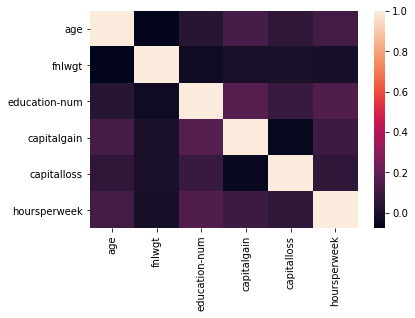

In [65]:
sns.heatmap(df.corr())

In [66]:
display(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K


In [67]:
df[df == '?'] = np.nan
df['class'].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [69]:
df.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capitalgain       False
capitalloss       False
hoursperweek      False
native-country     True
class             False
dtype: bool

In [70]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [71]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capitalgain       False
capitalloss       False
hoursperweek      False
native-country    False
class             False
dtype: bool

In [72]:
def split_data(df):
    y=df['class']
    X=df.drop(labels=['class'],axis=1)
    train_df, test_df, train_labels, test_labels=train_test_split(X,y,train_size=15000,test_size=5000,random_state=41,stratify=y)
    return train_df, test_df, train_labels, test_labels

In [73]:
train_df, test_df, train_labels, test_labels=split_data(df);

In [74]:
train_df.shape

(15000, 14)

In [75]:
test_df.shape

(5000, 14)

In [76]:
test_labels.value_counts()

<=50K    3804
>50K     1196
Name: class, dtype: int64

In [77]:
train_labels.value_counts()

<=50K    11411
>50K      3589
Name: class, dtype: int64

In [78]:
def create_preprocess(train_df,test_df):
    categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
    for feature in categorical:
        le = preprocessing.LabelEncoder()
        train_df[feature] = le.fit_transform(train_df[feature])
        test_df[feature] = le.transform(test_df[feature])
    scaler = StandardScaler()

    train_df = pd.DataFrame(scaler.fit_transform(train_df), columns = train_df.columns)

    test_df = pd.DataFrame(scaler.transform(test_df), columns = train_df.columns)

    return train_df,test_df
    

In [79]:
train_df,test_df=create_preprocess(train_df,test_df)

In [85]:
def model_train(train_df,train_labels,test_df,test_labels):
    clf = RandomForestClassifier()
    clf.fit(train_df,train_labels)
    probb=clf.predict_proba(test_df)
    print("Test set AUC: {}".format(roc_auc_score(test_labels,probb[:,-1])))
    test_pred=clf.predict(test_df)
    print('Test set accuracy :',accuracy_score(test_labels,test_pred))
    target_names = ['<=50K', '>50K']
    print(classification_report(test_labels, test_pred, target_names=target_names))
    
    
    

In [86]:
model_train(train_df,train_labels,test_df,test_labels);
# The model has a precision of 0.88 on the majority class and 0.70 for the minority class. So we should expect
#the relative frequency to decrease when balancing the test set. Hence the accuracy should decrease

Test set AUC: 0.8904884490538036
Test set accuracy : 0.842
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3804
        >50K       0.69      0.61      0.65      1196

    accuracy                           0.84      5000
   macro avg       0.79      0.76      0.77      5000
weighted avg       0.84      0.84      0.84      5000



In [82]:
x_test_df=test_df.copy()
x_test_df['class']=test_labels.to_list()
maj_list=x_test_df.index[x_test_df['class']=='<=50K'].to_list()
maj_list=np.random.choice(maj_list,1000,False)
x_test_df=x_test_df[x_test_df.index.isin(maj_list)| (x_test_df['class']=='>50K')]
x_test_labels=x_test_df['class']
x_test_df=x_test_df.drop(labels=['class'],axis=1)
# new test set obtained by keeping all instances from the minority class and sampling (without replacement)
#1000 instances from the majority class,

In [87]:
model_train(train_df,train_labels,x_test_df,x_test_labels);

Test set AUC: 0.8879255852842809
Test set accuracy : 0.7540983606557377
              precision    recall  f1-score   support

       <=50K       0.67      0.91      0.77      1000
        >50K       0.89      0.62      0.73      1196

    accuracy                           0.75      2196
   macro avg       0.78      0.77      0.75      2196
weighted avg       0.79      0.75      0.75      2196



In [ ]:
#The accuracy has reduced to 0.7540983606557377 as compared to imbalanced test set accuracy of 0.842. 
#The AUC However is approximately the same 0.8879255852842809 as opposed to 0.8904884490538036 of imbalanced test set
#AUC concerns the model’s ability to rank a positive instance ahead of a negative,
#which is not affected in any direction by changing the class proportions in the test set.
#Precision of minority class is increased and majority class decreases.